In [1]:
import pandas as pd
import json
import numpy as np 

In [2]:
df_mini = pd.read_json('mini-ada-dataset/youniverse-mini/__mini__yt_metadata_en_10k.jsonl', lines=True)

# Quick overview of the data
print(df_mini.head())
print(df_mini.info())

         categories                channel_id                  crawl_date  \
0  Film & Animation  UCzWrhkg9eK5I8Bm3HfV-unA  2019-10-31 20:19:26.270363   
1  Film & Animation  UCzWrhkg9eK5I8Bm3HfV-unA  2019-10-31 20:19:26.914516   
2  Film & Animation  UCzWrhkg9eK5I8Bm3HfV-unA  2019-10-31 20:19:26.531203   
3  Film & Animation  UCzWrhkg9eK5I8Bm3HfV-unA  2019-10-31 20:19:28.335329   
4  Film & Animation  UCzWrhkg9eK5I8Bm3HfV-unA  2019-10-31 20:19:30.328487   

                                         description  dislike_count  \
0  Lego City Police Lego Firetruck Cartoons about...            1.0   
1  Lego Marvel SuperHeroes Lego Hulk Smash Iron-M...            1.0   
2  Lego City Police Lego Fireman Cartoons about L...          779.0   
3  Lego Harry Potter Complete Lego New Movie for ...           24.0   
4  Lego City Police LONG VIDEO for kids Lego Fire...           13.0   

    display_id  duration  like_count  \
0  SBqSc91Hn9g      1159         8.0   
1  UuugEl86ESY      2681      

# Calculate Overall Dislike Distribution

count     98695.000000
mean         88.049091
std        1240.543303
min           0.000000
25%           0.000000
50%           3.000000
75%          20.000000
max      305009.000000
Name: dislike_count, dtype: float64


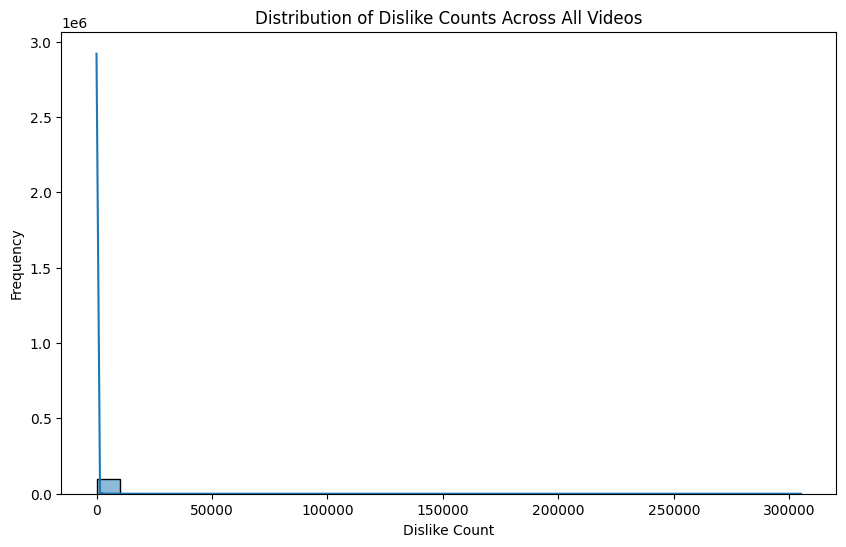

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for dislikes
dislike_stats = df_mini['dislike_count'].describe()
print(dislike_stats)

# Histogram of dislike counts
plt.figure(figsize=(10, 6))
sns.histplot(df_mini['dislike_count'], bins=30, kde=True)
plt.title('Distribution of Dislike Counts Across All Videos')
plt.xlabel('Dislike Count')
plt.ylabel('Frequency')
plt.show()

Okay this is veeeeeeeery right-skewed... Let's see the top 10000 (a random threshold for now)

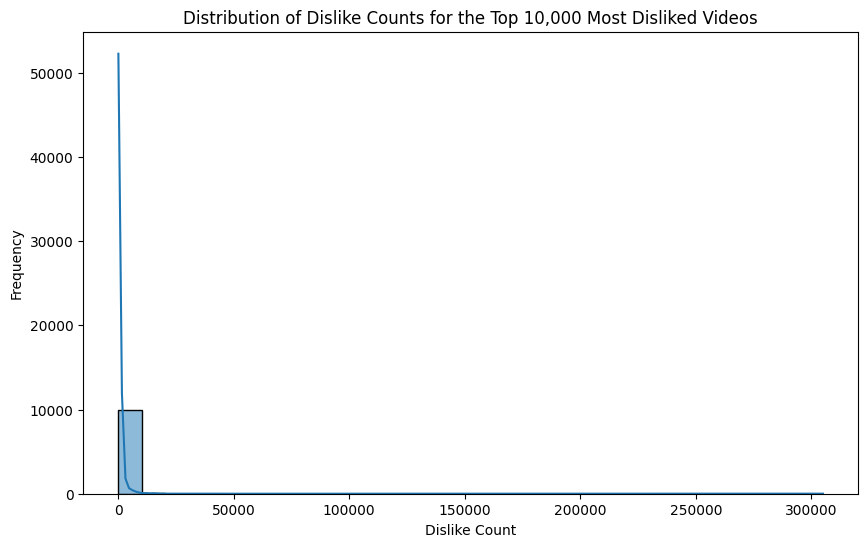

In [4]:
top_disliked_videos = df_mini.nlargest(10000, 'dislike_count')
plt.figure(figsize=(10, 6))
sns.histplot(top_disliked_videos['dislike_count'], bins=30, kde=True)
plt.title('Distribution of Dislike Counts for the Top 10,000 Most Disliked Videos')
plt.xlabel('Dislike Count')
plt.ylabel('Frequency')
plt.show()

Still... **It's extreme right skew!** Meaning the majority of videos are clustered at lower dislike counts, with most having counts close to zero. Let's try plotting it in log scale:

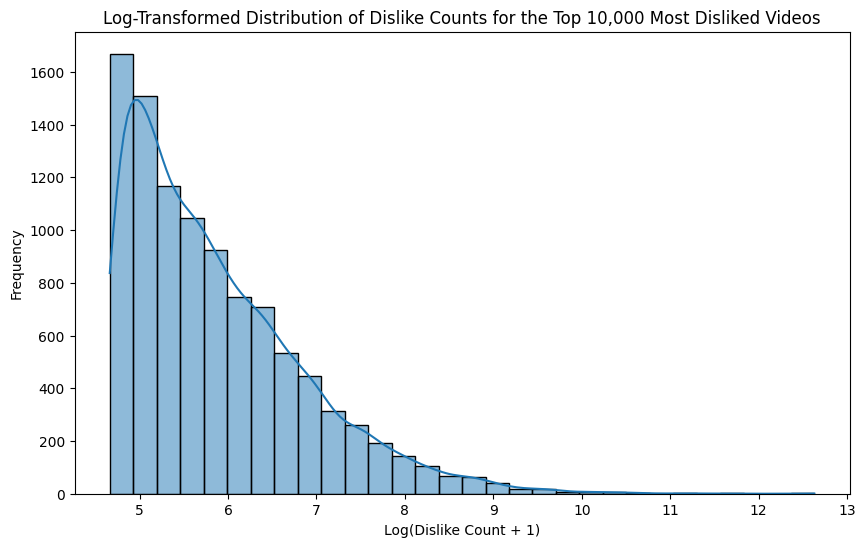

In [5]:
# Apply log transformation (adding 1 to avoid issues with zero dislikes)
top_disliked_videos['log_dislike_count'] = np.log1p(top_disliked_videos['dislike_count'])

# Plot the histogram of log-transformed dislike counts
plt.figure(figsize=(10, 6))
sns.histplot(top_disliked_videos['log_dislike_count'], bins=30, kde=True)
plt.title('Log-Transformed Distribution of Dislike Counts for the Top 10,000 Most Disliked Videos')
plt.xlabel('Log(Dislike Count + 1)')
plt.ylabel('Frequency')
plt.show()

### Observation: Long Tail of Dislike Counts
* Most videos have a log-transformed dislike count *between 5 and 7*, meaning that the majority have between approximately 150 to 1,000 dislikes.
This suggests that even among the most disliked videos, there’s a large cluster with relatively moderate dislike counts, while ***only a (very) few have very high counts***.

* This illustrates a *"long tail" effect*, where the presence of values all the way up to around log count = 12 (~ 162,754 dislikes) are extremely rare, but with extremely high dislike counts. These (outlier) videos might represent ***controversial or viral content that gathered significant negative attention***, which can be worth investigating individually to understand why they attracted such a high level of dislikes.

--> For further analysis, we can identify these extreme outliers and potentially explore interesting insights on what kind of content generate such kinds of extreme reaction among viewers, across each or all category.

Now let's look at each category:

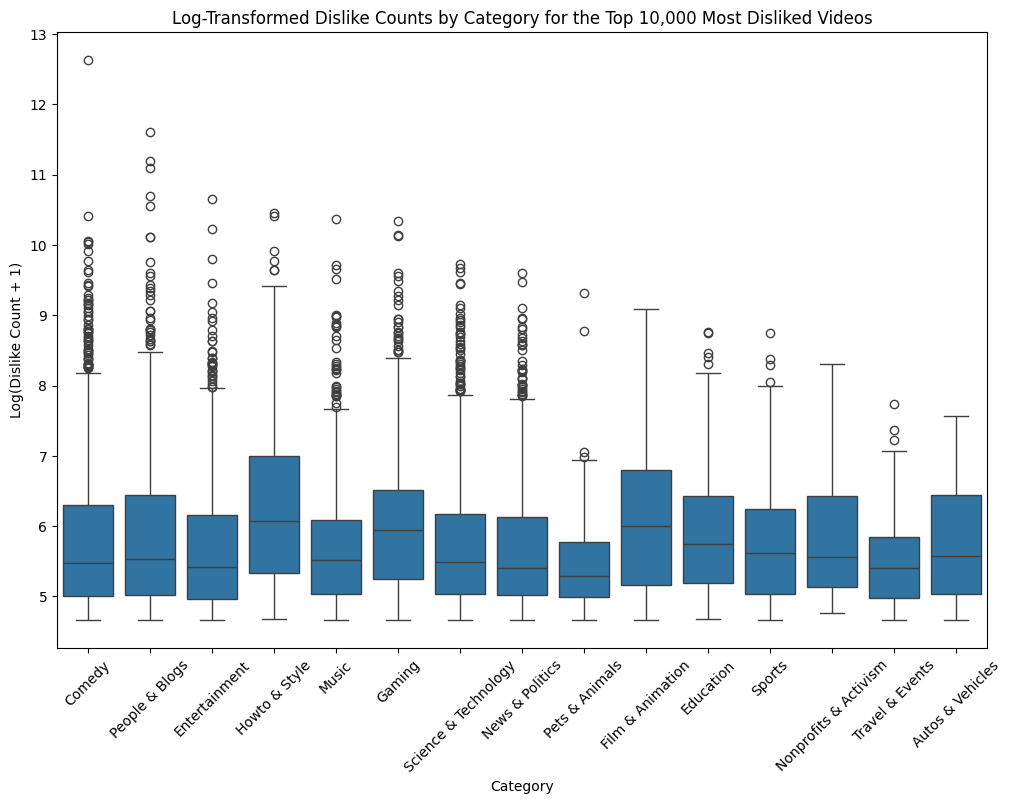

In [11]:
# Boxplot of log-transformed dislikes by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='categories', y='log_dislike_count', data=top_disliked_videos)
plt.title('Log-Transformed Dislike Counts by Category for the Top 10,000 Most Disliked Videos')
plt.xlabel('Category')
plt.ylabel('Log(Dislike Count + 1)')
plt.xticks(rotation=45)
plt.show()

## Observation: Different trends with respect to outliers and median of like counts
* Outliers: A lot especially in **Comedy** and **People and Blogs** --> Some extreme controversial stuffs?; Followed by Entertainment, Music, Gaming, Science & Technology (lots of outliers)
* Median: Highest in **Howto & Style** (guess: maybe creators uploaded some tutorials, viewers followed but it didn't work/didn't suit them so they dislike // based on what I read on [some reddit comment](https://www.reddit.com/r/CasualConversation/comments/1d856u9/comment/l743yql/?utm_source=share&utm_medium=web3x&utm_name=web3xcss&utm_term=1&utm_content=share_button)); **Gaming**; **Film & Animation**

--> The higher "outliers" are those with "exceptional" cases that are disliked, and the higher "median" ones are those that are overall/generally more disliked??

# Descriptive figures: Absolute and Relative Dislike Count

In [21]:
# Display the top 10 most disliked videos
most_disliked_videos = top_disliked_videos.nlargest(10, 'dislike_count')
most_disliked_videos[['title', 'dislike_count', 'view_count', 'categories']]

,title,dislike_count,view_count,categories
70116,Bieber After the Dentist,305009.0,44625639,Comedy
12862,99 % Lose this TRY NOT TO LAUGH Challenge - Fu...,109846.0,141312663,People & Blogs
12888,You will have TEARS IN YOUR EYES FROM LAUGHING...,72877.0,28678033,People & Blogs
12839,Cute TWIN Babies Share Pacifier - Funny Baby V...,65553.0,66366201,People & Blogs
12855,Adorable Babies Playing With Dogs and Cats - F...,44101.0,39526527,People & Blogs
24183,AIB : The Demonetization Circus,42281.0,6595590,Entertainment
12758,The FUNNIEST and CUTEST video you'll see today...,38092.0,61654994,People & Blogs
28156,Guys Vs. Girls Back To School Morning Routine!...,34890.0,44716094,Howto & Style
70117,Dramatic Bieber,33293.0,8583543,Comedy
30853,Edible Jewel Jell-O Cube Ice DIY ジュエル キューブアイス,33165.0,43946054,Howto & Style


Aligning with prior observation: The top ones are indeed those "exceptional" few belonging to **Comedy** and **People & Blogs**.

But why is it either Justin Bieber, babies or "funny" videos 💀 --> might be an interesting cultural gauge, to see what's "negatively trending" at a certain time point.


**Idea**: Can show interactive plot that has top 10 disliked videos by year? by category?

Since dislike count is just an absolute number, let's also see its value *with respect to* likes, views or other metrics

In [13]:
# Step 1: Filter videos with both like_count and dislike_count > 0 to avoid division errors and ensure meaningful ratios
df_filtered = df_mini[(df_mini['like_count'] > 0) & (df_mini['dislike_count'] > 0)]

# Step 2: Calculate the like-dislike ratio and the dislike ratio
df_filtered['like_dislike_ratio'] = df_filtered['like_count'] / df_filtered['dislike_count']
df_filtered['dislike_ratio'] = df_filtered['dislike_count'] / (df_filtered['like_count'] + df_filtered['dislike_count'])

# Step 3: Calculate view-adjusted metrics for context
df_filtered['like_count_per_view'] = df_filtered['like_count'] / df_filtered['view_count']
df_filtered['dislike_count_per_view'] = df_filtered['dislike_count'] / df_filtered['view_count']

# Step 4: Identify the top videos by extreme dislike ratios (either very high or very low)
# Get videos with the highest dislike ratios (i.e., most disliked relative to like_count)
most_disliked_videos = df_filtered.sort_values(by='dislike_ratio', ascending=False).head(10)

# Get videos with the lowest dislike ratios (i.e., most liked relative to dislike_count)
most_liked_videos = df_filtered.sort_values(by='dislike_ratio', ascending=True).head(10)

# Get videos with the highest like-dislike ratios (popular but still polarizing)
high_like_dislike_ratio = df_filtered.sort_values(by='like_dislike_ratio', ascending=False).head(10)

/var/folders/2j/w898mtss6bncgwx8ldvsq6yr0000gn/T/ipykernel_23406/2956028385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['like_dislike_ratio'] = df_filtered['like_count'] / df_filtered['dislike_count']
/var/folders/2j/w898mtss6bncgwx8ldvsq6yr0000gn/T/ipykernel_23406/2956028385.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['dislike_ratio'] = df_filtered['dislike_count'] / (df_filtered['like_count'] + df_filtered['dislike_count'])
/var/folders/2j/w898mtss6bncgwx8ldvsq6yr00

In [14]:
print("Top 10 Most Disliked Videos (High Dislike Ratio):")
most_disliked_videos[['title', 'categories', 'like_count', 'dislike_count', 'view_count', 'dislike_ratio', 'like_count_per_view', 'dislike_count_per_view']]

Top 10 Most Disliked Videos (High Dislike Ratio):


,title,categories,like_count,dislike_count,view_count,dislike_ratio,like_count_per_view,dislike_count_per_view
47889,Press TV's European news bulletin: Polish far-...,News & Politics,3.0,218.0,1380,0.986425,0.002174,0.157971
67300,SENSUAL PANTSUIT ANTHEM (Official Rapped Music...,Comedy,692.0,20228.0,229130,0.966922,0.003020,0.088282
54370,Black lives matter protesters block tram lines...,News & Politics,1.0,15.0,762,0.937500,0.001312,0.019685
51878,Surfer does NOT expect THIS shocking ocean vis...,News & Politics,2.0,24.0,2243,0.923077,0.000892,0.010700
57742,Gaming Update 5-12-13: Old and New Games+ E3 2...,Gaming,1.0,12.0,157,0.923077,0.006369,0.076433
47949,Video showing UK soldiers smiling and posing f...,News & Politics,9.0,103.0,835,0.919643,0.010778,0.123353
48282,Neo-nazi presence in UK armed forces,News & Politics,1.0,11.0,251,0.916667,0.003984,0.043825
56173,Flight evacuation video 2,News & Politics,1.0,11.0,1932,0.916667,0.000518,0.005694
94847,A Girl Decides To Lose Her Body - Vivek Agnihotri,Entertainment,1.0,9.0,2932,0.900000,0.000341,0.003070
47918,Tommy Robinson has fooled the white working cl...,News & Politics,8.0,70.0,741,0.897436,0.010796,0.094467


Mainly **News & Politics!** (unsurprisingly)

In [19]:
print("\nTop 10 Least Disliked Videos (Low Dislike Ratio):")
most_liked_videos[['title', 'categories', 'like_count', 'dislike_count', 'view_count', 'dislike_ratio', 'like_count_per_view', 'dislike_count_per_view']]


Top 10 Least Disliked Videos (Low Dislike Ratio):


,title,categories,like_count,dislike_count,view_count,dislike_ratio,like_count_per_view,dislike_count_per_view
76372,GASSYBANANAHUTCH (Rocket League w/Seananners a...,People & Blogs,2302.0,1.0,61913,0.000434,0.037181,0.000016
56482,Avatar The Last Airbender Unreleased Soundtrac...,Gaming,1645.0,1.0,71502,0.000608,0.023006,0.000014
75031,NiP Road To The Playoffs (SL i-League Season 2...,Gaming,1049.0,1.0,26699,0.000952,0.039290,0.000037
52908,Kuzu Mellow - sunflower feelings (prod. by kor...,People & Blogs,950.0,1.0,23798,0.001052,0.039919,0.000042
11474,Fingerpicking for Beginners Lesson 9,Education,873.0,1.0,34768,0.001144,0.025109,0.000029
82971,Skins Rise: Behind The Scenes,Entertainment,839.0,1.0,55206,0.001190,0.015198,0.000018
32275,Portal 2 Coop done with 60 portals in 53:52 - ...,Gaming,763.0,1.0,18765,0.001309,0.040661,0.000053
28760,Door safety ~ Mystic messenger comic dub,Entertainment,6796.0,9.0,126692,0.001323,0.053642,0.000071
22773,Серединка для цветов Канзаши МК/ DIY / DIY cen...,People & Blogs,749.0,1.0,10577,0.001333,0.070814,0.000095
18935,Minecraft [Survival Games]: Ep. 42 - Special M...,Gaming,733.0,1.0,8794,0.001362,0.083352,0.000114


Nothing really interesting, very general topics, mainly gaming. Maybe because it's nothing so noone dislikes or just feels anything about it?

**Ideas to be explored:**
* Dislike content in each category / each country (interactive graph like [this one](https://epfl-ada.github.io/ada-2023-project-radatouille/)) -> What are their common theme(s)?
    * Even sub-category within each category (like what Chingchi did for different "programming languages" under "education")
* Dislike count through time (need access to the bigger scope of the data)
* Correlation analysis: Correlation between dislike and other engagement metrics like viewership, # comments, etc (e.g do more disliked videos have more # comments?)
* Channel-focused analysis (channel of video(s) with most dislikes)
    * What are their other videos are? # views and subscribers? (e.g are other videos they uploaded also consistently disliked, or it's just this one video?)
    * Channel characteristics? (e.g are there certain channel characteristics that influence the dislike it receives? -- can even extend channel info with Youtube API (e.g thumbnail, even playlist?)
* Matching and comparing between most disliked and most liked videos? (not sure what yet but I was thinking of the causal analysis on observational study in the lecture; and based on pure observation: sometimes the most disliked video can also be the most liked (e.g "Despacito" or "Gangnam style", you can read more [here](https://en.wikipedia.org/wiki/List_of_most-disliked_YouTube_videos#:~:text=As%20of%20December%202021%2C%20Cocomelon,upload%20on%20December%206%2C%202018.)), so it can be interesting to do some kind of comparison but idk how for now lol).